# Lab 01 - Hill Climbing Optimizaton for Linear Regression 

## Instructions

The goal of this lab is to give you hands on experience working with hill climbing search algorithms. In this lab you will be working with a random datatset I generated based off of a line. Your goal will be to try to figure out what line I used (i.e. you are looking to try to figure out what the slope and intcept are for the line that best fits this dataset). 

We will be using hill climbing for this (as opposed to the slightly more complicated Gradient Descent). We will talk more in class about gradient descent, but its very important that you understand hill climbing first. 

## Dataset Description 
You will be working with a small dataset (`random.csv`) made up of 1000 randomly generated points. The dataset has two columns `x` and `y`. The `x` column is your input and the `y` column is your output. Your goal is to uncover the function `f(x) = mx+b` given the traing data `x` and labels `y`. 

In [77]:
#this code loads in the python packages you are going to need for this lab

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import linear_model

In [78]:
#this code loads in your dataset as a pandas dataframe 
data = pd.read_csv("random.csv")

#this code shows you just the first couple of lines of your dataset 
data.head()

,x,y
0,5.02,28.083458
1,1.87,22.790723
2,6.48,31.312447
3,9.30,34.002755
4,1.75,20.577190


## Hill Climbing Step-by-Step

Before we jump into implementing hill climbing all on our own, lets work through the first couple of steps. 

let's pretend your first guess as to the correct line for this data is `f(x) = 2x + 17` meaning your guess is that the slope `m` is 2 and the intercept `b` is 17. 

1. What would the predicted outputs be given this function? i.e. plug in the x values from your data into the function to get the predicited y values


2. Store these predicitons in an array, and then calculate and print the error for this guess using mean squared error. Note: you should use the function `mean_squared_error` from the sklearn package. 


3. Given this starting line, there are 8 possible neighbors lines from this starting line: 
    * m and b+1
    * m and b-1
    * m+1 and b+1
    * m+1 and b-1
    * m+1 and b
    * m-1 and b+1
    * m-1 and b-1
    * m-1 and b
  
  
  What is the error for each of these "neighbor" lines?
  
  
4. Given starting point `f(x) = 2x + 17`, which neighbor line should you chose as your next step?


5. Now from this line you chose in Question 4, what are your neighbors? and what is the error for each of these neighbor lines? 


6. Now repeat step 5 once again (i.e. chose one of the lines, find all the neighbors of that new line, and print the errors for each new line)

In [79]:
#your code goes here

In [80]:
#1
x_val = data.x.values
y_val = data.y.values

m = 2
b = 17

def func():
    y_pred = m*x_val + b
    return y_pred

func()

array([27.04, 20.74, 29.96, 35.6 , 20.5 , 24.9 , 24.38, 33.8 , 28.46,
       20.76, 28.32, 26.8 , 28.02, 21.1 , 33.14, 33.16, 24.98, 25.92,
       26.64, 36.48, 34.16, 27.42, 23.58, 29.58, 22.72, 24.64, 23.18,
       20.24, 28.96, 21.3 , 35.76, 24.38, 27.52, 26.12, 32.3 , 26.3 ,
       27.76, 31.6 , 24.9 , 28.66, 20.64, 28.84, 29.8 , 22.22, 22.74,
       32.14, 23.16, 25.94, 19.44, 24.18, 19.54, 30.42, 27.42, 30.38,
       19.28, 35.56, 35.84, 33.74, 23.88, 29.14, 21.26, 36.24, 35.58,
       31.76, 33.94, 32.78, 23.78, 31.04, 20.  , 21.04, 31.94, 35.54,
       26.68, 28.06, 27.96, 22.7 , 28.28, 26.86, 34.74, 31.44, 35.48,
       34.66, 25.36, 36.82, 19.46, 31.9 , 35.5 , 34.7 , 28.06, 24.7 ,
       29.94, 36.66, 24.  , 21.22, 22.02, 29.56, 20.32, 29.14, 19.7 ,
       32.52, 25.66, 32.02, 29.02, 20.04, 30.2 , 22.4 , 24.38, 26.86,
       32.6 , 25.06, 24.24, 21.18, 35.04, 27.64, 29.8 , 24.6 , 21.58,
       32.06, 31.18, 23.46, 27.46, 26.78, 24.08, 36.22, 35.54, 28.46,
       21.06, 33.52,

In [81]:
#2
arr = [func()]

mean_squared_error([y_val], arr)

8.625431198202563

In [82]:
#3
def err1(m, b):
    y_pred = m*x_val + b
    return mean_squared_error([y_val], [y_pred])

err1(m, b+1),\
err1(m, b-1),\
err1(m+1, b+1),\
err1(m+1, b-1),\
err1(m+1, b),\
err1(m-1, b+1),\
err1(m-1, b-1),\
err1(m-1, b)

(5.244227036902563,
 14.006635359502564,
 29.825160820382365,
 16.252769142982363,
 22.038964981682366,
 56.47853525342276,
 87.57574357602277,
 71.02713941472277)

In [83]:
#4

Based on the result above, the neighbor line with m and b+1 has the lowest error which I should choose for the next step.

In [84]:
#5-possible neighbors

- m and b+2
- m and b
- m+1 and b+2
- m+1 and b+1
- m+1 and b
- m-1 and b+2
- m-1 and b+1
- m-1 and b

In [85]:
#errors of each neighbor line
def err2(m, b):
    y_pred = m*(x_val) + b
    return mean_squared_error([y_val], [y_pred])

err2(m, b+2),\
err2(m, b),\
err2(m+1, b+2),\
err2(m+1, b+1),\
err2(m+1, b),\
err2(m-1, b+2),\
err2(m-1, b+1),\
err2(m-1, b)

(3.8630228756025637,
 8.625431198202563,
 39.61135665908236,
 29.825160820382365,
 22.038964981682366,
 43.92993109212276,
 56.47853525342276,
 71.02713941472277)

In [86]:
#6-possible neighbors

- m and b+3
- m and b+1
- m+1 and b+3
- m+1 and b+2
- m+1 and b+1
- m-1 and b+3
- m-1 and b+2
- m-1 and b+1

In [87]:
#errors of each neighbor line
def err3(m, b):
    y_pred = m*x_val + b
    return mean_squared_error([y_val], [y_pred])

err3(m, b+3),\
err3(m, b+1),\
err3(m+1, b+3),\
err3(m+1, b+2),\
err3(m+1, b+1),\
err3(m-1, b+3),\
err3(m-1, b+2),\
err3(m-1, b+1)

(4.481818714302563,
 5.244227036902563,
 51.397552497782364,
 39.61135665908236,
 29.825160820382365,
 33.38132693082276,
 43.92993109212276,
 56.47853525342276)

## Hill Climbing as an Algorithm

Now we are reading to translate our approach into a proper algorithm. Let's write a function instead to do the hill clibming we just did step-by-step in the previous section. 

7. Fill out the function and variables in the code block below. The function takes in the following parameters: 
    * x_val: the x values of your dataset (hint: use something like `data["x"].values` to get just the x column of your dataset 
    * y_val: the y values of your dataset
    * m: the starting slope value (the default is 2 to match our example in the begining of the lab) 
    * b: the starting intercept value (the defualt is 17 to match our example in the begining of the lab) 
    * max_iter: the maximum number of iterations for the algorithm to run (the default is 100)

this function will return two values: `m_pred` and `b_pred` which are the algorithms guesses as to the best slope and intercept for the given dataset. 

In [88]:
#7
def hill_climb(x_val, y_val, m = 2, b = 17, max_iter = 100): 
    
    #these lines give us our starting error
    y_pred = m*x_val + b
    error = mean_squared_error(y_val, y_pred)
    
    #these variables store our current guess for the best slope and intercept
    m_pred = m
    b_pred = b
    
    for i in range(0, max_iter):
        #put your code here inside this loop for hill climbing
        for i in range(0, 9):
            nbr = [[m, b], [m, b+1], [m, b-1], [m+1, b+1], [m+1, b-1], [m+1, b], [m-1, b+1], [m-1, b-1], [m-1, b]]
            y_pred = nbr[i][0]*x_val + nbr[i][1]
            err = mean_squared_error(y_val, y_pred)
            if err < error:
                error = err
                m_pred = nbr[i][0]
                b_pred = nbr[i][1]
        if error == 0: #stop if error is 0
            break
        m = m_pred
        b = b_pred
    
    #this line is our return statement, make sure it stays out of the for loop
    return m_pred, b_pred, error

## Double Checking your Work 

8. Test your funtion out by printing the predicited slope and intercept returned by your function given default parameters


9. print the mean squared error for this predicited line. Is this score lower, higher, or the smae as the error you got in question 2? Does this make sense? 


10. Create a scatter plot showing the datapoints of the dataset and draws a line showing the predicited line generated by your function. Does your guess look correct? 


11. Finally, run the following code to check your answer versus what is returned by python's linear regression model: 

```model_ols =  linear_model.LinearRegression()
model_ols.fit(data["x"].values.reshape(len(data["x"].values), 1),data["y"].values) 
print("slope:", model_ols.coef_[0])
print("intercept:", model_ols.intercept_) ```

In [89]:
#8
slope, intercept, error = hill_climb(x_val, y_val)

print(slope) #slope
print(intercept) #intercept

2
19


In [90]:
#9
print(error)

3.8630228756025637


This score is lower than the error computed in question 2. This result should make sense because the purpose of  hill climbing search is to find the best-predicted line within the lowest error by checking all possible neighbor lines.

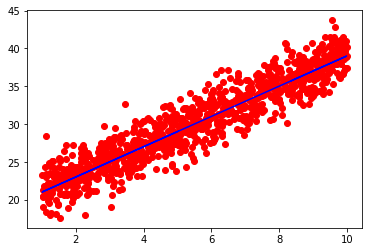

In [91]:
#10
plt.scatter(x_val, y_val, color = "red")
plt.plot(x_val, slope * x_val + intercept, color="blue")

Based on the plot above, my guess looks correct because the predicted line fairly aligns with the datapoints.

In [92]:
#11
model_ols =  linear_model.LinearRegression()
model_ols.fit(data["x"].values.reshape(len(data["x"].values), 1),data["y"].values) 
print("slope:", model_ols.coef_[0])
print("intercept:", model_ols.intercept_)

slope: 2.002285135819146
intercept: 19.17784256777664


My prediction fairly matches the result computed by python's linear regression model.